In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
df=pd.read_excel('/Users/muzahidulislam/Developer/ML/healthCarePremium_project/premiums_rest.xlsx')

In [10]:
df['Genetical_Risk']=0

In [11]:
df.shape

(29904, 14)

In [12]:
df.columns=df.columns.str.replace(' ','_').str.lower()

In [13]:
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


In [14]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### Handle NA value

In [15]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0],inplace=True)
df['employment_status'].fillna(df['employment_status'].mode()[0],inplace=True)

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/1040079542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoking_status'].fillna(df['smoking_status'].mode()[0],inplace=True)
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/1040079542.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [16]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [17]:
df['income_level'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
29899    False
29900    False
29901    False
29902    False
29903    False
Name: income_level, Length: 29904, dtype: bool

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [20]:
df.shape

(29895, 14)

In [21]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [22]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29895.000000,29895.000000,29895.000000,29895.000000,29895.0
mean,43.397893,2.380164,23.367152,20893.855093,0.0
std,13.412810,1.431148,24.739037,6936.583713,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15698.000000,0.0
50%,42.000000,3.000000,17.000000,20492.000000,0.0
75%,52.000000,3.000000,32.000000,26360.500000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [23]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-1, -3])

In [24]:
df['number_of_dependants']=abs(df['number_of_dependants'])

In [25]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29895.000000,29895.000000,29895.000000,29895.000000,29895.0
mean,43.397893,2.386185,23.367152,20893.855093,0.0
std,13.412810,1.421086,24.739037,6936.583713,0.0
min,26.000000,0.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15698.000000,0.0
50%,42.000000,3.000000,17.000000,20492.000000,0.0
75%,52.000000,3.000000,32.000000,26360.500000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [26]:
df[df.age>100].shape

(58, 14)

In [27]:
numeric_columns = df.select_dtypes(['int64','float64'])
numeric_columns.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

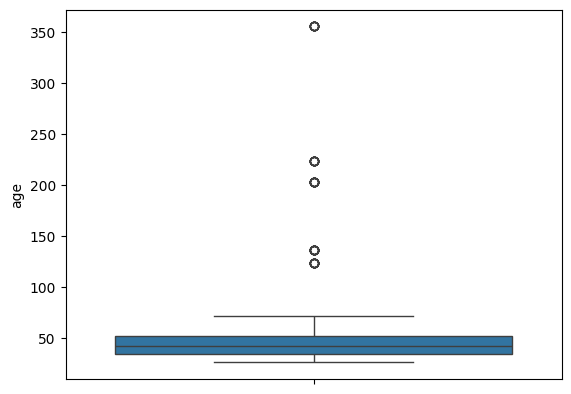

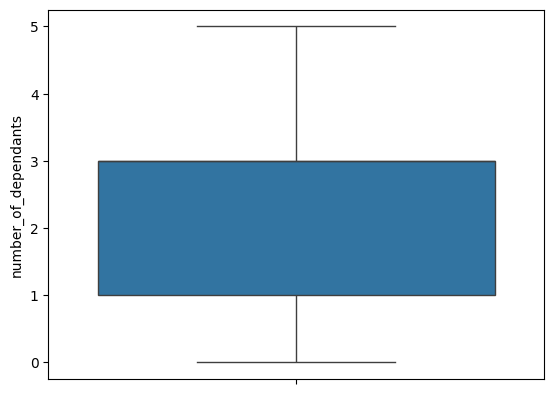

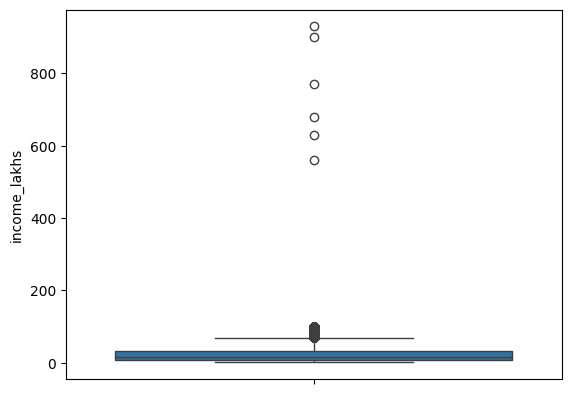

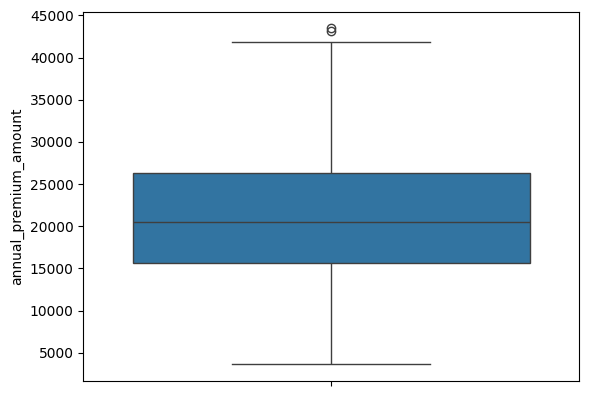

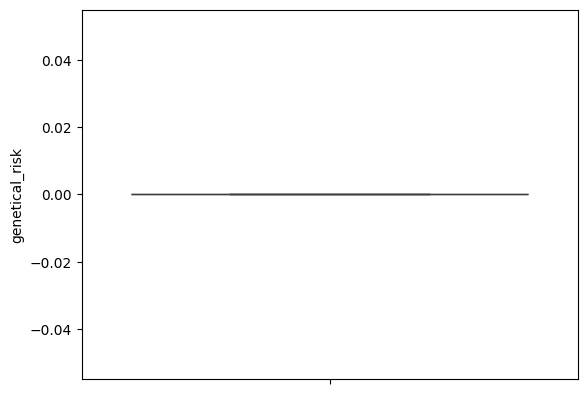

In [28]:
for col in numeric_columns:
    sns.boxplot(df[col])
    plt.show()

In [29]:
df.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0


In [30]:
df[df.age>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [31]:
df.shape

(29895, 14)

In [32]:
df1=df[df.age<100].copy()

In [33]:
df1.shape

(29837, 14)

<Axes: ylabel='age'>

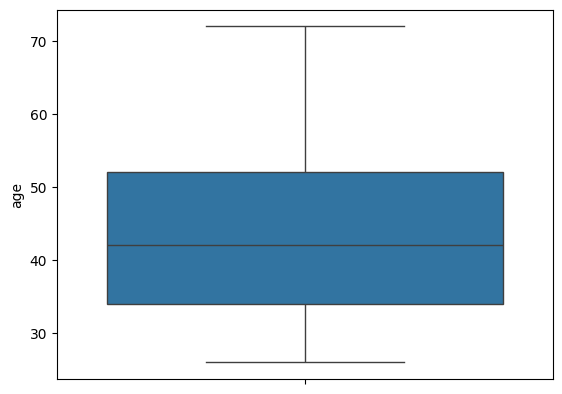

In [34]:
sns.boxplot(df1['age'])

In [35]:
df1.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


In [36]:
df1.income_lakhs.shape

(29837,)

In [37]:
q3=df.income_lakhs.quantile(.75)

In [38]:
q3

np.float64(32.0)

In [39]:
def get_iqr_bounds(col):
    q1,q3 = col.quantile([.25,.75])
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    return lower_bound,upper_bound

In [40]:
get_iqr_bounds(df1.income_lakhs)

(-30.5, 69.5)

In [41]:
quatile_treshold=df1.income_lakhs.quantile(.999)

In [42]:
df1[df1.income_lakhs>quatile_treshold].shape

(6, 14)

In [43]:
df2=df1[df1.income_lakhs<quatile_treshold]

In [44]:
df2.shape

(29763, 14)

In [45]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29763.000000,29763.000000,29763.000000,29763.000000,29763.0
mean,43.099318,2.387931,23.053960,20893.336122,0.0
std,11.044729,1.420672,22.178129,6929.366828,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15699.000000,0.0
50%,42.000000,3.000000,17.000000,20483.000000,0.0
75%,52.000000,3.000000,32.000000,26356.500000,0.0
max,72.000000,5.000000,99.000000,43471.000000,0.0


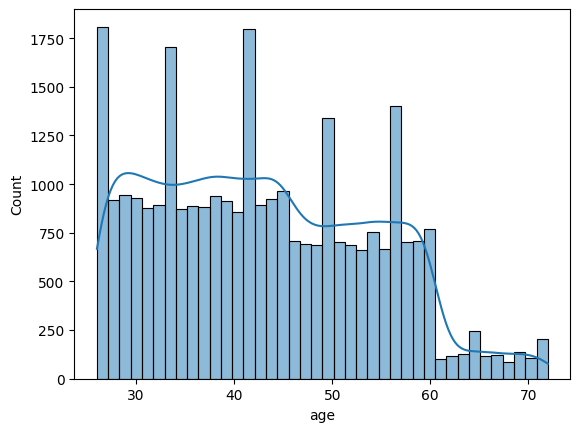

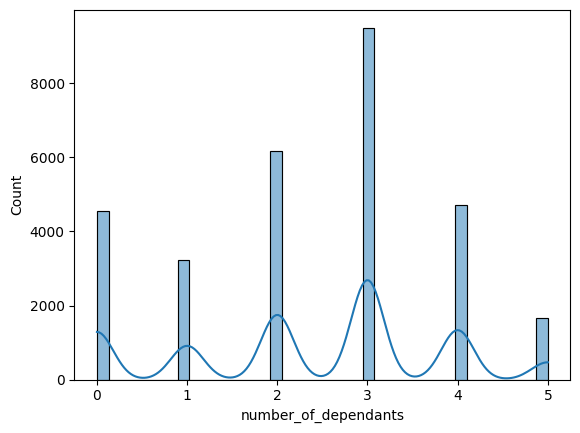

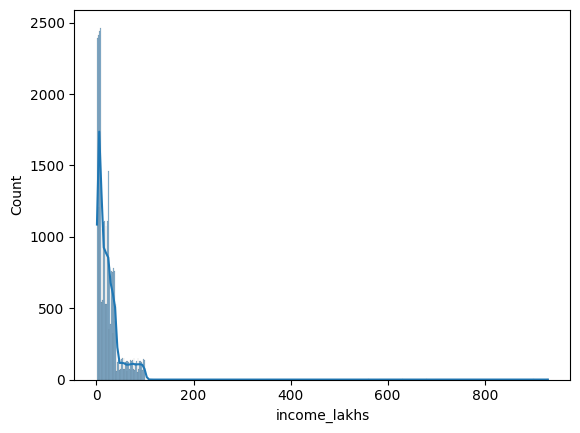

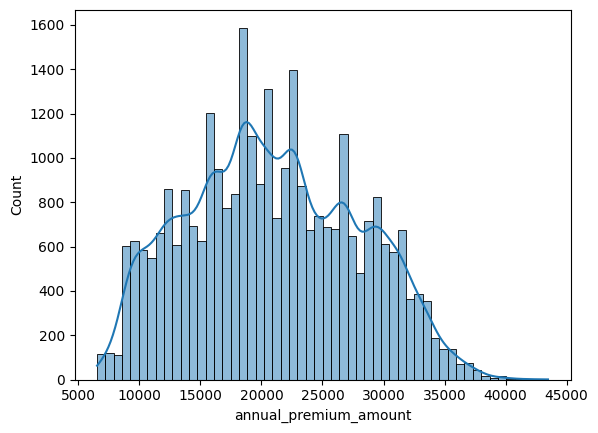

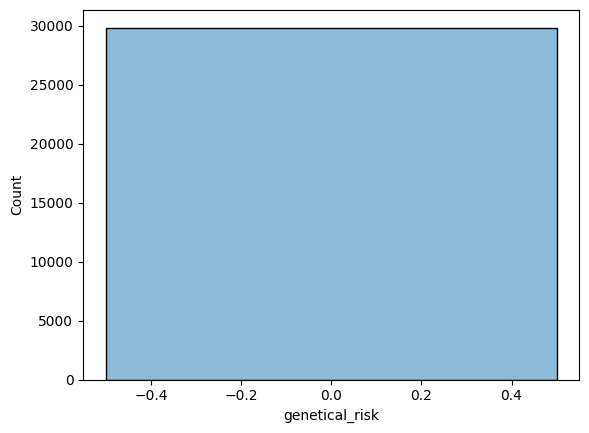

In [46]:
for col in numeric_columns:
    sns.histplot(df1[col],kde=True)
    plt.show()

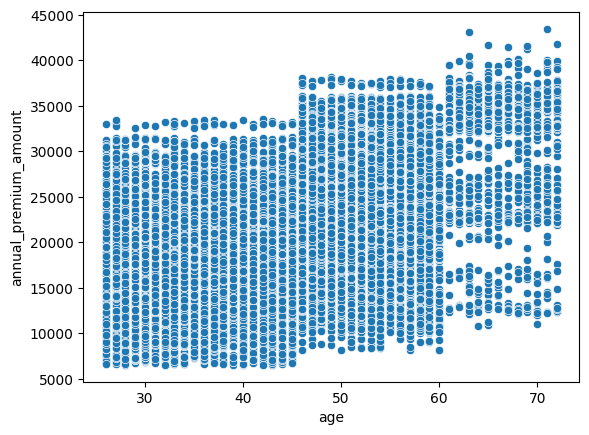

In [47]:
sns.scatterplot(df2, x='age',y='annual_premium_amount')
plt.show()

In [48]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [49]:
df2.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
genetical_risk            int64
dtype: object

In [50]:
categorical_columns=df2.select_dtypes('object')

In [51]:
categorical_columns.columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [52]:
for col in categorical_columns:
    print(col, ": ", df2[col].unique())

gender :  ['Male' 'Female']
region :  ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status :  ['Unmarried' 'Married']
bmi_category :  ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status :  ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status :  ['Salaried' 'Self-Employed' 'Freelancer']
income_level :  ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history :  ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan :  ['Bronze' 'Silver' 'Gold']


In [53]:
df2.smoking_status=df2['smoking_status'].replace(['Smoking=0', 'Does Not Smoke','Not Smoking'], 'No Smoking')

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/2590855560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.smoking_status=df2['smoking_status'].replace(['Smoking=0', 'Does Not Smoke','Not Smoking'], 'No Smoking')


In [54]:
df2.smoking_status.unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [55]:
for col in categorical_columns:
    print(col, ": ", df2[col].unique())

gender :  ['Male' 'Female']
region :  ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status :  ['Unmarried' 'Married']
bmi_category :  ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status :  ['No Smoking' 'Regular' 'Occasional']
employment_status :  ['Salaried' 'Self-Employed' 'Freelancer']
income_level :  ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history :  ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan :  ['Bronze' 'Silver' 'Gold']


In [56]:
pct_count=df.gender.value_counts(normalize=True)
pct_count

gender
Male      0.549189
Female    0.450811
Name: proportion, dtype: float64

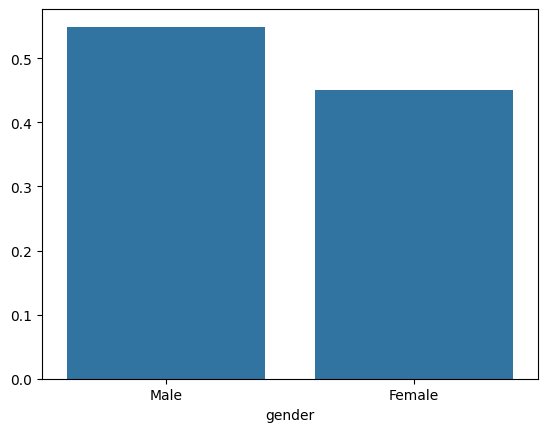

In [57]:
sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

In [58]:
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


In [59]:
crosstab=pd.crosstab(df2.income_level, df2.insurance_plan)
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4355
25L - 40L,301,2636,3142
<10L,6054,527,4342
> 40L,211,3232,610


<Axes: xlabel='insurance_plan', ylabel='income_level'>

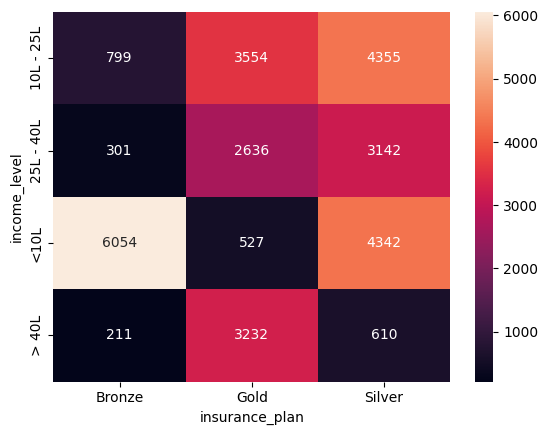

In [60]:
sns.heatmap(crosstab,annot=True,fmt='d')

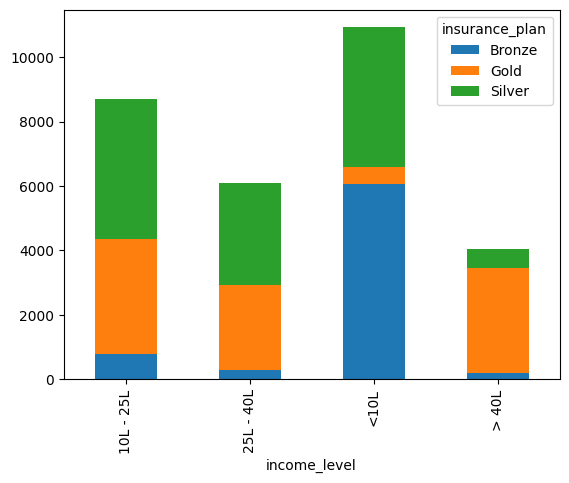

In [61]:
crosstab.plot(kind='bar',stacked=True)
plt.show()

In [62]:
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


In [63]:
df2['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [64]:
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower())

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/4265722347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower())
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/4265722347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower())


In [65]:
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,None


In [66]:
risk_score={
    'diabetes':6,
    'heart disease':8,
    'high blood pressure':6,
    'thyroid':5,
    'no disese':0,
    'none':0
}


In [67]:
df2.disease1.fillna('none',inplace=True)
df2.disease2.fillna('none',inplace=True)

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/1522888226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.disease1.fillna('none',inplace=True)
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/1522888226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.disease1.fillna('none',inplace=True)
/var/fo

In [68]:
df2.disease2.unique()

array(['none', 'high blood pressure', 'heart disease', 'thyroid'],
      dtype=object)

In [69]:
df2['total_risk_score']=0
for disease in ['disease1','disease2']:
    df2['total_risk_score']+=df2[disease].map(risk_score)
   

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/1925737481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score']=0
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/1925737481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score']+=df2[disease].map(risk_score)
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/1925737481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [70]:
df2['total_risk_score'].fillna(0,inplace=True)
df2.head(10)

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/3873623025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['total_risk_score'].fillna(0,inplace=True)
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_13634/3873623025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score'].fillna(0,inplace=T

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6.0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6.0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6.0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0.0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,6.0
5,33,Male,Southeast,Married,3,Normal,Regular,Self-Employed,<10L,4,Diabetes & High blood pressure,Silver,20653,0,diabetes,high blood pressure,12.0
6,43,Male,Northeast,Married,3,Overweight,Regular,Salaried,> 40L,46,Thyroid,Gold,26926,0,thyroid,none,5.0
7,59,Female,Southeast,Unmarried,0,Overweight,No Smoking,Freelancer,10L - 25L,21,No Disease,Gold,26101,0,no disease,none,0.0
8,46,Female,Southeast,Married,4,Normal,Occasional,Self-Employed,10L - 25L,21,Thyroid,Gold,27176,0,thyroid,none,5.0
9,68,Female,Southwest,Married,1,Normal,No Smoking,Self-Employed,<10L,1,Diabetes,Bronze,12596,0,diabetes,none,6.0


In [71]:
for col in categorical_columns:
    print(col,' :',df2[col].unique())

gender  : ['Male' 'Female']
region  : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status  : ['Unmarried' 'Married']
bmi_category  : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status  : ['No Smoking' 'Regular' 'Occasional']
employment_status  : ['Salaried' 'Self-Employed' 'Freelancer']
income_level  : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history  : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan  : ['Bronze' 'Silver' 'Gold']


In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder

In [73]:
df2.shape

(29763, 17)

In [74]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6.0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6.0


In [75]:
df_ = df2.drop(columns=['medical_history','disease1','disease2'])
df_.head(10)
df_.shape

(29763, 14)

In [76]:
x=df_.drop(columns='annual_premium_amount')
y=df_['annual_premium_amount']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3)
x_train.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,genetical_risk,total_risk_score
28182,51,Male,Southeast,Unmarried,0,Obesity,Occasional,Freelancer,<10L,2,Silver,0,5.0
16847,49,Male,Northwest,Married,3,Overweight,No Smoking,Salaried,<10L,2,Silver,0,6.0


In [77]:
x_train.shape

(20834, 13)

In [78]:
x_train.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'genetical_risk',
       'total_risk_score'],
      dtype='object')

In [79]:
nominal_col=['gender','region','marital_status','bmi_category','smoking_status','employment_status']
num_features = ['age', 'number_of_dependants', 'income_lakhs', 'genetical_risk', 'total_risk_score']

In [80]:
category=[
    ['<10L', '10L - 25L', '25L - 40L','> 40L'],
    ['Bronze','Silver','Gold']
]

preprocessor=ColumnTransformer(transformers=[
    
    ('ord_en', OrdinalEncoder(categories=category),['income_level','insurance_plan']),
    ('scaling',MinMaxScaler(), num_features),
    ('nominal_en',OneHotEncoder(drop='first',dtype=int), nominal_col)
    
])

### Make pipeline & Export Model

In [81]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

pipe=Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

In [82]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord_en',
                                                  OrdinalEncoder(categories=[['<10L',
                                                                              '10L '
                                                                              '- '
                                                                              '25L',
                                                                              '25L '
                                                                              '- '
                                                                              '40L',
                                                                              '> '
                                                                              '40L'],
                                                                             ['Bronze',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['income_level',
                                                   'insurance_plan']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['age',
                                                   'number_of_dependants',
                                                   'income_lakhs',
                                                   'genetical_risk',
                                                   'total_risk_score']),
                                                 ('nominal_en',
                                                  OneHotEncoder(dr...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [83]:
pipe.score(x_test,y_test)

0.9979718923568726

In [84]:
x = pd.DataFrame({
    'age': [29],
    'gender': ['Female'],
    'region': ['Southeast'],
    'marital_status': ['Unmarried'],
    'number_of_dependants': [0],
    'bmi_category': ['Underweight'],
    'smoking_status': ['No Smoking'],
    'employment_status': ['Salaried'],
    'income_level': ['<10L'],
    'income_lakhs': [2],
    'insurance_plan': ['Bronze'],
    'genetical_risk': [5],
    'total_risk_score': [0.0]
})
x

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,genetical_risk,total_risk_score
0,29,Female,Southeast,Unmarried,0,Underweight,No Smoking,Salaried,<10L,2,Bronze,5,0.0


In [85]:
pipe.predict(x)

array([7752.486], dtype=float32)

In [86]:
from joblib import dump
dump(pipe,'artifacts/model_rest.joblib')

['artifacts/model_rest.joblib']

### build DataFrame after preprocess

In [ ]:
x_train_transformed_aray = preprocessor.fit_transform(x_train)

In [ ]:
x_test_transformed_array=preprocessor.transform(x_test)

In [ ]:
ord_en_features = preprocessor.named_transformers_['ord_en'].feature_names_in_
scaling_features = preprocessor.named_transformers_['scaling'].feature_names_in_
cat_features = preprocessor.named_transformers_['nominal_en'].get_feature_names_out(nominal_col)

all_features = list(ord_en_features) + list(scaling_features) + list(cat_features)
all_features

In [ ]:
x_train_process = pd.DataFrame(x_train_transformed_aray, columns=all_features, index=x_train.index)
x_test_process = pd.DataFrame(x_test_transformed_array, columns=all_features, index=x_test.index)

print(x_train_process.shape, x_train_process.shape)



In [ ]:
for col in ['gender','region','marital_status','bmi_category','smoking_status','employment_status']:
    print(col, " :" ,df_[col].unique())

In [ ]:

for col in ['gender','region','marital_status','bmi_category','smoking_status','employment_status']:
    oh=OneHotEncoder(drop='first')
    en = oh.fit_transform(df_[[col]])
    print(col,' : ',en.shape)

### Model Train

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import classification_report
lr = LinearRegression()
lr.fit(x_train_process,y_train)

In [ ]:
lr.score(x_test_process,y_test)


In [ ]:
lr.score(x_train_process,y_train)

### Model Fine tune

In [ ]:
lr1=Lasso()
lr1.fit(x_train_process,y_train)
lr1.score(x_test_process,y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
lr2=RandomForestRegressor()
lr2.fit(x_train_process,y_train)
lr2.score(x_test_process,y_test)

In [ ]:
lr3=DecisionTreeRegressor()
lr3.fit(x_train_process,y_train)
lr3.score(x_test_process,y_test)

In [ ]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(x_train_process,y_train)
print(model.score(x_test_process,y_test), model.score(x_train_process,y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
y_p=model.predict(x_test_process)


In [ ]:
mean_squared_error(y_test,y_p)

In [ ]:
x_test.index

In [ ]:
x_test_process.index

### Eror Analysis

In [ ]:
residuals = y_p - y_test

In [ ]:
residuals_pct = residuals * 100 / y_test
residuals_pct

In [ ]:
results_df=pd.DataFrame({
    'actual':y_test,
    'predict':y_p,
    'diff':residuals,
    'diff_pct':residuals_pct
})
results_df.head(3)

In [ ]:
sns.histplot(results_df['diff_pct'], kde=True)

In [ ]:
extreme_result_df = results_df[np.abs(results_df.diff_pct)>10]
extreme_result_df.shape

In [ ]:
extreme_errors_pct = extreme_result_df.shape[0]*100/results_df.shape[0]
extreme_errors_pct

In [ ]:
results_df[np.abs(results_df.diff_pct)>10].sort_values('diff_pct', ascending=False)

In [ ]:
extreme_result_df.index 

In [ ]:
x_test_process.index

### Actual aproach

In [ ]:
extreme_errors_df = x_test_process.loc[extreme_result_df.index]
extreme_errors_df.head(3)

In [ ]:
sns.histplot(extreme_errors_df.age, label='Extreme Errors', kde=True)
sns.histplot(x_test_process.age, kde=True, label = 'Overall')
plt.legend()
plt.show()

In [ ]:
for col in extreme_errors_df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(extreme_errors_df[col], label='Extreme Errors', kde=True,color='red')
    sns.histplot(x_test_process[col], kde=True, label = 'Overall', color='blue')
    plt.legend()
    plt.title(f'Distribution of {col} for Extreme Errors vs Overall')
    plt.show()

In [ ]:
sns.histplot(extreme_errors_df.age)
plt.show()

### To get the actual age, reverse transform age


In [ ]:
actual_errors = x_test.loc[extreme_result_df.index]
actual_errors.head(3)

In [ ]:
sns.histplot(actual_errors.age)

In [ ]:
 actual_errors.age.quantile(.999)